# RKHS lbfgs-b

In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import admg_rkhs_lbfgs
import pandas as pd

In [5]:
np.random.seed(42)
# Step 1: Define the covariance matrix
True_Sigma = np.array([[1, 0.6],    # Variance of X is 1, covariance between X and Y is 0.8
                  [0.6, 1]])   # Variance of Y is 1, covariance between Y and X is 0.8

epsilon = np.random.multivariate_normal([0] * 2, True_Sigma, size=200)

# Optionally, check the empirical covariance matrix
empirical_covariance = np.cov(epsilon, rowvar=False)
print("Empirical Covariance Matrix:")
print(empirical_covariance)

epsilon1 = epsilon[:, 0]
epsilon2 = epsilon[:, 1]
x = np.random.uniform(low=-3, high=3, size=200)
true_x = x + epsilon1
y = np.array([np.sin(x)*6 + epsilon2 for x, epsilon2 in zip(x, epsilon2)])
X = np.column_stack((true_x, y))
data = pd.DataFrame(X, columns=['x', 'y'])
covariance = data.cov()
print("covariance: ", covariance)

Empirical Covariance Matrix:
[[0.89925943 0.54768565]
 [0.54768565 0.94098793]]
covariance:            x          y
x  3.676145   6.587080
y  6.587080  19.393988


iteration:  0
rho:  1.0
mle:  tensor(6.2863, grad_fn=<AddBackward0>)
mse:  tensor(11.7074, grad_fn=<MulBackward0>)
h_val:  tensor(2.0000e-08, grad_fn=<AddBackward0>)
mle:  tensor(10.2161, grad_fn=<AddBackward0>)
mse:  tensor(11.0171, grad_fn=<MulBackward0>)
h_val:  tensor(0.0001, grad_fn=<AddBackward0>)
mle:  tensor(7.2984, grad_fn=<AddBackward0>)
mse:  tensor(9.1271, grad_fn=<MulBackward0>)
h_val:  tensor(0.0071, grad_fn=<AddBackward0>)
mle:  tensor(5.8710, grad_fn=<AddBackward0>)
mse:  tensor(7.3664, grad_fn=<MulBackward0>)
h_val:  tensor(0.0772, grad_fn=<AddBackward0>)
mle:  tensor(6.6278, grad_fn=<AddBackward0>)
mse:  tensor(8.3931, grad_fn=<MulBackward0>)
h_val:  tensor(0.0207, grad_fn=<AddBackward0>)
mle:  tensor(6.1386, grad_fn=<AddBackward0>)
mse:  tensor(7.2567, grad_fn=<MulBackward0>)
h_val:  tensor(0.0881, grad_fn=<AddBackward0>)
mle:  tensor(5.3644, grad_fn=<AddBackward0>)
mse:  tensor(5.0296, grad_fn=<MulBackward0>)
h_val:  tensor(1.5497, grad_fn=<AddBackward0>)
mle:  tens

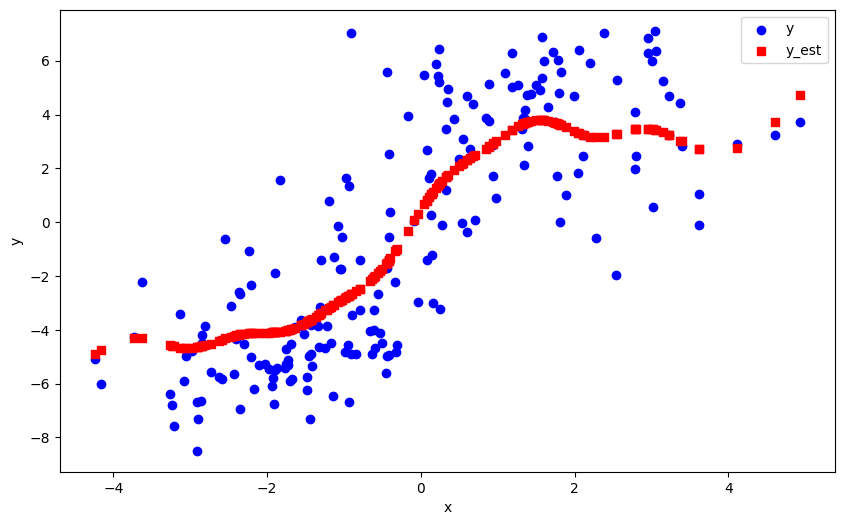

The programm is closed


In [6]:
eq_model2 = admg_rkhs_lbfgs.ADMG_RKHSDagma(data, gamma = 1)
model2 = admg_rkhs_lbfgs.RKHS_discovery(eq_model2, admg_class = "none", verbose=True)
W1, W2, output = model2.fit(lambda1=1e-3, tau=1e-4, w_threshold=0.0)
print("W1: ", W1)
print("W2: ", W2)
sign, logdet = torch.linalg.slogdet(torch.tensor(W2))
print("logdet: ", logdet)
y_hat = output[:, 1].detach().numpy()
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(true_x, y, label='y', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(true_x, y_hat, label='y_est', color='red', marker='s') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")